In [1]:
from google.colab import drive
drive.mount(  '/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls /content/drive/MyDrive

'240310660104_ApplicationForm (1).pdf'
 240310660104_ApplicationForm.pdf
'2. Synthesis exercise 2, 3, 4 and 5.pdf'
 AntiraggingAffidavitForm.pdf
'Applications of LASER.gslides'
 archive
'archive (1).zip'
'can you please make a pdf of the answers of all q....gdoc'
 CENTROIDS-2024.pdf
'CHAPTERWISE TOP 109 PYQs JEE Mains 2022 + answer key.pdf'
 Classroom
'CO2 Laser.gslides'
'Colab Notebooks'
'college allotment and fees receipt .pdf'
'Coursera APL4Q0QSRUQ1_copy.pdf'
 cv1.gdoc
 CV.gdoc
'Differential Calculus (1).gdoc'
'Differential Calculus.gdoc'
'Doc Scanner'
'Doc Scanner Upload'
'EM UNIT 1 -PART1-2024.pdf'
 FCA24_copy.pdf
 FCA24.pdf
'FE 2024_NEW SYLLABY (1).gdoc'
 feature_scaler.pkl
 google.pdf
 gradient_boosting_model.pkl
 gradient_boosting_results.csv
 IMG_20210630_175152.jpg
'Important Documents.pdf'
'Kiran academy .pdf'
'Kiran academy..pdf'
'*Kiran Vedic academy*.pdf'
'Lect 1.gslides'
'Lect 2.gslides'
 logistic_regression_model.pkl
 logistic_regression_results.csv
'MAHADBT appln (1).p

In [3]:
# Install required packages
!pip install tensorflow opencv-python pillow pandas numpy matplotlib scikit-learn grad-cam

# If using PyTorch instead:
# !pip install torch torchvision pytorch-grad-cam

# For deployment
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44283 sha256=3c62c1aa3d77bac0e23e0ab8ba2e74e3292d2d8f49ced21ce78a86daeaccda18
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.0
    Uninstalling cachetools-7.0.0:
      Successfully uninstalled cachetools-7.0.0


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import gc
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    roc_curve, auc
)

# Image processing
from skimage.feature import hog, local_binary_pattern
from skimage import exposure
import joblib
from tqdm.notebook import tqdm

# Set random seed
np.random.seed(42)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [5]:
from google.colab import drive
drive.mount('/content/drive')
MIMIC_ROOT = '/content/drive/MyDrive/archive (1)/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os, zipfile


ZIP_PATH = '/content/drive/MyDrive/archive (1).zip'
EXTRACT_PATH = '/content/mimic_cxr_data'

os.makedirs(EXTRACT_PATH, exist_ok=True)
print("Extracting...")
with zipfile.ZipFile(ZIP_PATH, 'r') as z:
    z.extractall(EXTRACT_PATH)
print("✅ Done!")
print(os.listdir(EXTRACT_PATH))


Extracting...
✅ Done!
['train', 'mimic-cxr.csv', 'test', 'valid']


In [7]:
# Define dataset paths
CSV_PATH = os.path.join(EXTRACT_PATH, 'mimic-cxr.csv')
TRAIN_DIR = os.path.join(EXTRACT_PATH, 'train')
TEST_DIR = os.path.join(EXTRACT_PATH, 'test')
VALID_DIR = os.path.join(EXTRACT_PATH, 'valid')

# Verify paths exist
print("Checking dataset structure:")
print(f"CSV exists: {os.path.exists(CSV_PATH)}")
print(f"Train folder exists: {os.path.exists(TRAIN_DIR)}")
print(f"Test folder exists: {os.path.exists(TEST_DIR)}")
print(f"Valid folder exists: {os.path.exists(VALID_DIR)}")

if os.path.exists(TRAIN_DIR):
    print(f"\nTrain folder has {len(os.listdir(TRAIN_DIR))} images")
if os.path.exists(TEST_DIR):
    print(f"Test folder has {len(os.listdir(TEST_DIR))} images")
if os.path.exists(VALID_DIR):
    print(f"Valid folder has {len(os.listdir(VALID_DIR))} images")

Checking dataset structure:
CSV exists: True
Train folder exists: True
Test folder exists: True
Valid folder exists: True

Train folder has 83837 images
Test folder has 1455 images
Valid folder has 711 images


In [8]:
# Load CSV
df = pd.read_csv(CSV_PATH)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head(10))

print(f"\nColumn names:")
print(df.columns.tolist())

print(f"\nDataset info:")
print(df.info())

Dataset shape: (86003, 14)

First few rows:
        filename  split                        label  Atelectasis  \
0  s50000014.jpg  train                       Normal          0.0   
1  s50000052.jpg  train                       Normal          0.0   
2  s50000125.jpg  train                       Normal          0.0   
3  s50000173.jpg  train                       Normal          0.0   
4  s50000198.jpg  train                Consolidation          0.0   
5  s50001042.jpg  train                       Normal          0.0   
6  s50001080.jpg  train                       Normal          0.0   
7  s50001166.jpg  train  Pleural Effusion, Pneumonia          0.0   
8  s50001349.jpg  train                 Lung Opacity          0.0   
9  s50001417.jpg  train                       Normal          0.0   

   Cardiomegaly  Consolidation  Edema  Enlarged Cardiomediastinum  \
0           0.0            0.0    0.0                         0.0   
1           0.0            0.0    0.0                     

In [9]:
# Define disease columns
DISEASE_COLUMNS = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
                   'Enlarged Cardiomediastinum', 'Lung Lesion', 'Lung Opacity',
                   'Pleural Effusion', 'Pneumonia', 'Pneumothorax']

IMG_SIZE = (64, 64)
BATCH_SIZE = 100
USE_PCA = True
N_PCA_COMPONENTS = 100
SAMPLE_SIZE_PER_SPLIT = 1000

print(f"Config: {IMG_SIZE}, {BATCH_SIZE}, {SAMPLE_SIZE_PER_SPLIT} samples")


df = pd.read_csv(CSV_PATH)
print(df.shape)
display(df.head())

if 'Normal' not in df.columns:
    df['Normal'] = (df[DISEASE_COLUMNS].sum(axis=1) == 0).astype(int)

print(df['split'].value_counts())
print(df[DISEASE_COLUMNS].sum())


# Check for Normal column
if 'Normal' in df.columns:
    print("Normal column found in dataset")
else:
    print("Creating Normal column...")
    # A case is Normal if all disease columns are 0
    df['Normal'] = (df[DISEASE_COLUMNS].sum(axis=1) == 0).astype(int)


# Distribution of splits
print("\nDataset split distribution:")
print(df['split'].value_counts())

# Disease distribution
print("\nDisease distribution:")
disease_counts = df[DISEASE_COLUMNS + ['Normal']].sum().sort_values(ascending=False)
print(disease_counts)

Config: (64, 64), 100, 1000 samples
(86003, 14)


,filename,split,label,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Lung Lesion,Lung Opacity,Normal,Pleural Effusion,Pneumonia,Pneumothorax
0,s50000014.jpg,train,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,s50000052.jpg,train,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,s50000125.jpg,train,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,s50000173.jpg,train,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,s50000198.jpg,train,Consolidation,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


split
train    83837
test      1455
valid      711
Name: count, dtype: int64
Atelectasis                   18492.0
Cardiomegaly                  15816.0
Consolidation                  4258.0
Edema                         10778.0
Enlarged Cardiomediastinum     2751.0
Lung Lesion                    2497.0
Lung Opacity                  20651.0
Pleural Effusion              21284.0
Pneumonia                      6291.0
Pneumothorax                   3748.0
dtype: float64
Normal column found in dataset

Dataset split distribution:
split
train    83837
test      1455
valid      711
Name: count, dtype: int64

Disease distribution:
Normal                        31827.0
Pleural Effusion              21284.0
Lung Opacity                  20651.0
Atelectasis                   18492.0
Cardiomegaly                  15816.0
Edema                         10778.0
Pneumonia                      6291.0
Consolidation                  4258.0
Pneumothorax                   3748.0
Enlarged Cardiomediastinum

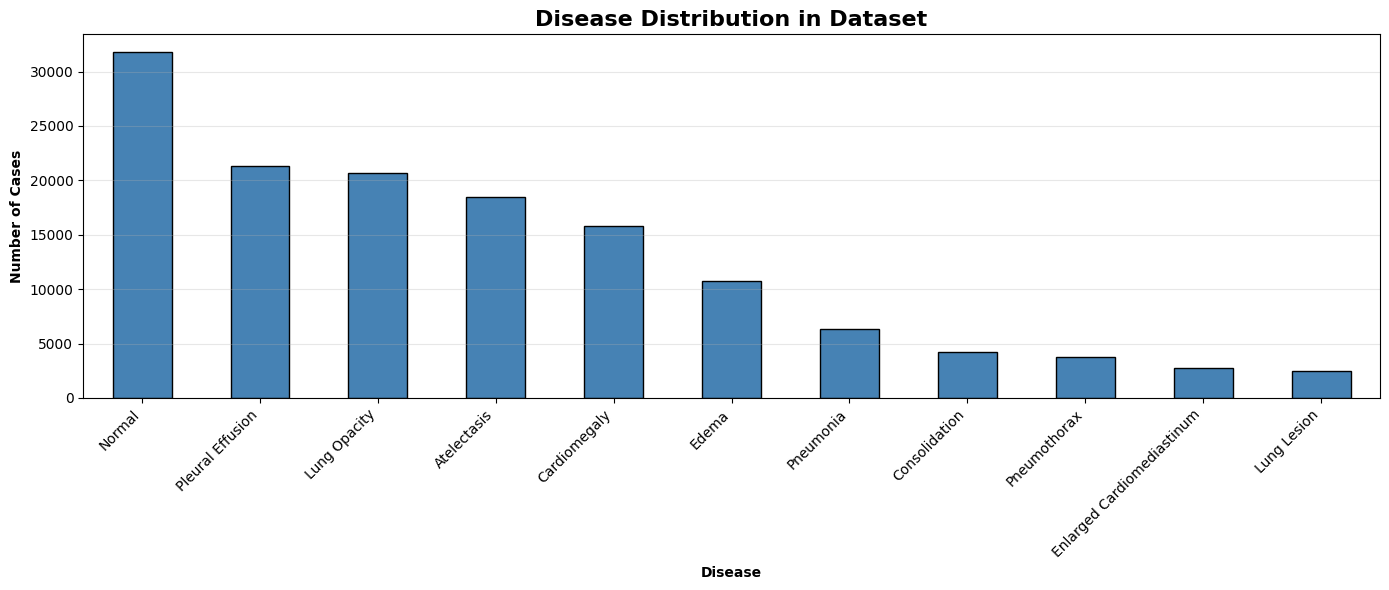

In [10]:
# Visualize disease distribution
plt.figure(figsize=(14, 6))
disease_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Disease Distribution in Dataset', fontweight='bold', fontsize=16)
plt.xlabel('Disease', fontweight='bold')
plt.ylabel('Number of Cases', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [11]:
# Build full image paths
def get_image_path(row):
    """Get full path to image based on split"""
    split_folder = row['split']
    filename = row['filename']

    if split_folder == 'train':
        return os.path.join(TRAIN_DIR, filename)
    elif split_folder == 'test':
        return os.path.join(TEST_DIR, filename)
    elif split_folder == 'valid':
        return os.path.join(VALID_DIR, filename)
    else:
        return None

df['image_path'] = df.apply(get_image_path, axis=1)
print("Sample paths:", df['image_path'].head(3).tolist())


# Verify images exist
df['image_exists'] = df['image_path'].apply(lambda x: os.path.exists(x) if x else False)

print(f"Images found: {df['image_exists'].sum()} / {len(df)}")
print(f"Missing images: {(~df['image_exists']).sum()}")

# Remove rows with missing images
df = df[df['image_exists']].copy()
df = df.drop('image_exists', axis=1)

print(f"\n✅ Final dataset size: {len(df)} samples with valid images")

Sample paths: ['/content/mimic_cxr_data/train/s50000014.jpg', '/content/mimic_cxr_data/train/s50000052.jpg', '/content/mimic_cxr_data/train/s50000125.jpg']
Images found: 86003 / 86003
Missing images: 0

✅ Final dataset size: 86003 samples with valid images


In [12]:
train_df = df[df['split']=='train'].sample(min(SAMPLE_SIZE_PER_SPLIT, len(df[df['split']=='train'])), random_state=42)
valid_df = df[df['split']=='valid'].sample(min(SAMPLE_SIZE_PER_SPLIT, len(df[df['split']=='valid'])), random_state=42)
test_df = df[df['split']=='test'].sample(min(SAMPLE_SIZE_PER_SPLIT, len(df[df['split']=='test'])), random_state=42)

print(f"Train: {len(train_df)}, Valid: {len(valid_df)}, Test: {len(test_df)}")


Train: 1000, Valid: 711, Test: 1000


In [13]:
def extract_features_batch(paths, size=(64,64)):
    feats = []
    for p in paths:
        try:
            img = cv2.imread(p, 0)
            if img is None:
                feats.append(None)
                continue
            img = cv2.resize(img, size) / 255.0

            # Features
            pixels = img.flatten()[::4]
            stats = [np.mean(img), np.std(img), np.min(img), np.max(img)]
            hist, _ = np.histogram(img, 16, (0,1))
            hist = hist/hist.sum()
            sx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
            sy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
            edge = np.sqrt(sx**2 + sy**2)
            edge_stats = [np.mean(edge), np.std(edge)]

            feats.append(np.concatenate([pixels, stats, edge_stats, hist]))
        except:
            feats.append(None)
    return feats

def process_batches(df, bs=100):
    all_f, all_l = [], []
    for i in tqdm(range(0, len(df), bs)):
        batch = df.iloc[i:i+bs]
        feats = extract_features_batch(batch['image_path'].tolist(), IMG_SIZE)
        for idx, f in enumerate(feats):
            if f is not None:
                all_f.append(f)
                all_l.append(batch.iloc[idx][DISEASE_COLUMNS].values)
        gc.collect()
    return np.array(all_f), np.array(all_l)

print("✅ Functions defined!")


✅ Functions defined!


In [14]:
print("Training...")
X_train, y_train = process_batches(train_df, BATCH_SIZE)
print(f"Train: {X_train.shape}")
gc.collect()


Training...


  0%|          | 0/10 [00:00<?, ?it/s]

Train: (1000, 1046)


17

In [15]:
print("Validation...")
X_valid, y_valid = process_batches(valid_df, BATCH_SIZE)
print(f"Valid: {X_valid.shape}")
gc.collect()


Validation...


  0%|          | 0/8 [00:00<?, ?it/s]

Valid: (711, 1046)


17

In [16]:
print("Test...")
X_test, y_test = process_batches(test_df, BATCH_SIZE)
print(f"Test: {X_test.shape}")
gc.collect()


Test...


  0%|          | 0/10 [00:00<?, ?it/s]

Test: (1000, 1046)


17

In [17]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_valid_s = scaler.transform(X_valid)
X_test_s = scaler.transform(X_test)
print("✅ Scaled!")


✅ Scaled!


In [18]:
if USE_PCA:
    pca = PCA(n_components=N_PCA_COMPONENTS, random_state=42)
    X_train_f = pca.fit_transform(X_train_s)
    X_valid_f = pca.transform(X_valid_s)
    X_test_f = pca.transform(X_test_s)
    print(f"PCA: {pca.explained_variance_ratio_.sum():.2%}")
else:
    X_train_f, X_valid_f, X_test_f = X_train_s, X_valid_s, X_test_s
    pca = None

del X_train_s, X_valid_s, X_test_s
gc.collect()


PCA: 89.01%


0

In [19]:
print("Training Random Forest...")

# Convert target labels to integer type
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)
y_test = y_test.astype(int)

rf_model = MultiOutputClassifier(
    RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
)
rf_model.fit(X_train_f, y_train)
print("✅ RF done!")

Training Random Forest...
✅ RF done!


In [20]:
print("Training Logistic Regression...")
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)
y_test = y_test.astype(int)
lr_model = MultiOutputClassifier(
    LogisticRegression(max_iter=500, random_state=42, n_jobs=-1)
)
lr_model.fit(X_train_f, y_train)
print("✅ LR done!")


Training Logistic Regression...
✅ LR done!


In [21]:
# Gradient Boosting Model
print("🚀 Training Gradient Boosting Classifier...\n")

gb_model = MultiOutputClassifier(
    GradientBoostingClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        verbose=1
    )
)

gb_model.fit(X_train_f, y_train)

print("\n✅ Gradient Boosting training complete!")

🚀 Training Gradient Boosting Classifier...

      Iter       Train Loss   Remaining Time 
         1           1.0096           41.18s
         2           0.9779           25.97s
         3           0.9352           20.70s
         4           0.9167           18.17s
         5           0.8753           16.59s
         6           0.8525           15.79s
         7           0.8214           15.39s
         8           0.8065           14.36s
         9           0.7952           13.54s
        10           0.7626           12.84s
        20           0.5604            9.31s
        30           0.4268            7.48s
        40           0.3277            6.14s
        50           0.2509            5.20s
        60           0.2061            4.23s
        70           0.1704            3.20s
        80           0.1346            2.16s
        90           0.1058            1.05s
       100           0.0877            0.00s
      Iter       Train Loss   Remaining Time 
         

In [22]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Comprehensive evaluation of a multi-output classifier
    """
    print(f"\n{'='*70}")
    print(f"EVALUATING: {model_name}")
    print(f"{'='*70}\n")

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Extract probabilities for positive class
    y_pred_proba_pos = np.array([proba[:, 1] for proba in y_pred_proba]).T

    # Overall metrics
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Overall Accuracy: {accuracy:.4f}\n")

    # Per-disease metrics
    results = []

    for i, disease in enumerate(DISEASE_COLUMNS):
        acc = accuracy_score(y_test[:, i], y_pred[:, i])
        prec = precision_score(y_test[:, i], y_pred[:, i], zero_division=0)
        rec = recall_score(y_test[:, i], y_pred[:, i], zero_division=0)
        f1 = f1_score(y_test[:, i], y_pred[:, i], zero_division=0)

        try:
            roc_auc = roc_auc_score(y_test[:, i], y_pred_proba_pos[:, i])
        except:
            roc_auc = 0.0

        results.append({
            'Disease': disease,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'AUC': roc_auc
        })

    results_df = pd.DataFrame(results)
    display(results_df)

    # Calculate averages
    print(f"\nAverage Metrics:")
    print(f"Accuracy:  {results_df['Accuracy'].mean():.4f}")
    print(f"Precision: {results_df['Precision'].mean():.4f}")
    print(f"Recall:    {results_df['Recall'].mean():.4f}")
    print(f"F1-Score:  {results_df['F1-Score'].mean():.4f}")
    print(f"AUC:       {results_df['AUC'].mean():.4f}")

    return results_df, y_pred, y_pred_proba_pos

print("✅ Evaluation function defined")

✅ Evaluation function defined


In [23]:
# Evaluate Random Forest
rf_results, rf_pred, rf_proba = evaluate_model(rf_model, X_test_f, y_test, "Random Forest")


EVALUATING: Random Forest

Overall Accuracy: 0.3530



,Disease,Accuracy,Precision,Recall,F1-Score,AUC
0,Atelectasis,0.808,0.100000,0.005435,0.010309,0.525242
1,Cardiomegaly,0.846,0.500000,0.006494,0.012821,0.484706
2,Consolidation,0.944,0.000000,0.000000,0.000000,0.481301
3,Edema,0.860,0.000000,0.000000,0.000000,0.507190
4,Enlarged Cardiomediastinum,0.972,0.000000,0.000000,0.000000,0.591931
5,Lung Lesion,0.944,0.000000,0.000000,0.000000,0.540557
6,Lung Opacity,0.756,0.100000,0.004237,0.008130,0.519265
7,Pleural Effusion,0.744,0.071429,0.004098,0.007752,0.495750
8,Pneumonia,0.932,0.000000,0.000000,0.000000,0.498493
9,Pneumothorax,0.950,0.000000,0.000000,0.000000,0.553360



Average Metrics:
Accuracy:  0.8756
Precision: 0.0771
Recall:    0.0020
F1-Score:  0.0039
AUC:       0.5198


In [24]:
# Evaluate Logistic Regression
lr_results, lr_pred, lr_proba = evaluate_model(lr_model, X_test_f, y_test, "Logistic Regression")


EVALUATING: Logistic Regression

Overall Accuracy: 0.3040



,Disease,Accuracy,Precision,Recall,F1-Score,AUC
0,Atelectasis,0.796,0.166667,0.027174,0.046729,0.480026
1,Cardiomegaly,0.835,0.133333,0.012987,0.023669,0.484104
2,Consolidation,0.934,0.000000,0.000000,0.000000,0.459878
3,Edema,0.855,0.200000,0.014388,0.026846,0.518078
4,Enlarged Cardiomediastinum,0.965,0.000000,0.000000,0.000000,0.491733
5,Lung Lesion,0.936,0.100000,0.017857,0.030303,0.514301
6,Lung Opacity,0.754,0.352941,0.050847,0.088889,0.555512
7,Pleural Effusion,0.724,0.289474,0.090164,0.137500,0.507611
8,Pneumonia,0.925,0.111111,0.014706,0.025974,0.527471
9,Pneumothorax,0.927,0.000000,0.000000,0.000000,0.533381



Average Metrics:
Accuracy:  0.8651
Precision: 0.1354
Recall:    0.0228
F1-Score:  0.0380
AUC:       0.5072


In [25]:
# Evaluate Gradient Boosting
gb_results, gb_pred, gb_proba = evaluate_model(gb_model, X_test_f, y_test, "Gradient Boosting")


EVALUATING: Gradient Boosting

Overall Accuracy: 0.3250



,Disease,Accuracy,Precision,Recall,F1-Score,AUC
0,Atelectasis,0.808,0.250000,0.021739,0.040000,0.526741
1,Cardiomegaly,0.839,0.181818,0.012987,0.024242,0.482001
2,Consolidation,0.942,0.250000,0.017857,0.033333,0.443232
3,Edema,0.853,0.100000,0.007194,0.013423,0.532165
4,Enlarged Cardiomediastinum,0.965,0.000000,0.000000,0.000000,0.565586
5,Lung Lesion,0.933,0.000000,0.000000,0.000000,0.508777
6,Lung Opacity,0.752,0.227273,0.021186,0.038760,0.513117
7,Pleural Effusion,0.731,0.195122,0.032787,0.056140,0.514707
8,Pneumonia,0.931,0.000000,0.000000,0.000000,0.512970
9,Pneumothorax,0.948,0.000000,0.000000,0.000000,0.495011



Average Metrics:
Accuracy:  0.8702
Precision: 0.1204
Recall:    0.0114
F1-Score:  0.0206
AUC:       0.5094


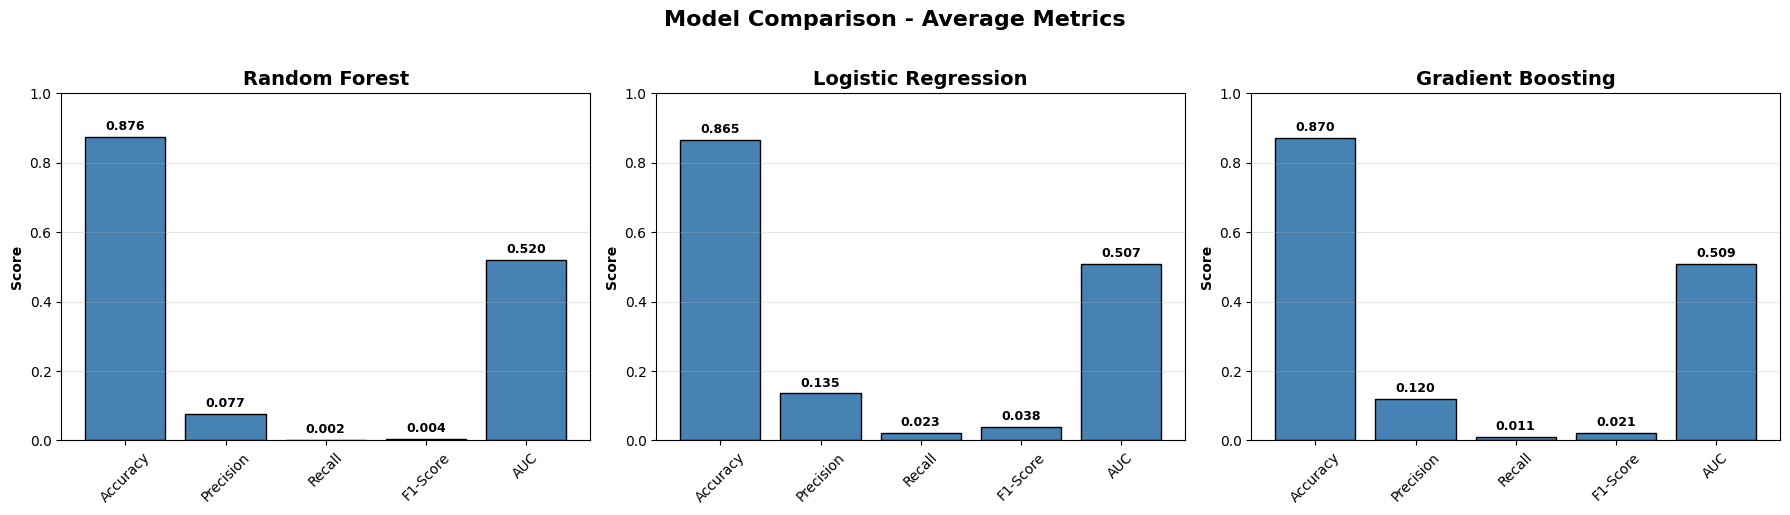

In [26]:
# Compare all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_results = [
    ('Random Forest', rf_results),
    ('Logistic Regression', lr_results),
    ('Gradient Boosting', gb_results)
]

for idx, (model_name, results_df) in enumerate(models_results):
    # Determine the correct F1 column name
    f1_col_name = 'F1-Score' if 'F1-Score' in results_df.columns else 'F1'

    avg_metrics = {
        'Accuracy': results_df['Accuracy'].mean(),
        'Precision': results_df['Precision'].mean(),
        'Recall': results_df['Recall'].mean(),
        f1_col_name: results_df[f1_col_name].mean(), # Use the determined column name
        'AUC': results_df['AUC'].mean()
    }

    # If the F1 column name is 'F1', rename it to 'F1-Score' for consistency in plotting
    if f1_col_name == 'F1':
        avg_metrics['F1-Score'] = avg_metrics.pop('F1')

    axes[idx].bar(avg_metrics.keys(), avg_metrics.values(), color='steelblue', edgecolor='black')
    axes[idx].set_title(model_name, fontweight='bold', fontsize=14)
    axes[idx].set_ylabel('Score', fontweight='bold')
    axes[idx].set_ylim([0, 1])
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, (metric, value) in enumerate(avg_metrics.items()):
        axes[idx].text(i, value + 0.02, f'{value:.3f}',
                      ha='center', fontweight='bold', fontsize=9)

plt.suptitle('Model Comparison - Average Metrics', fontweight='bold', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

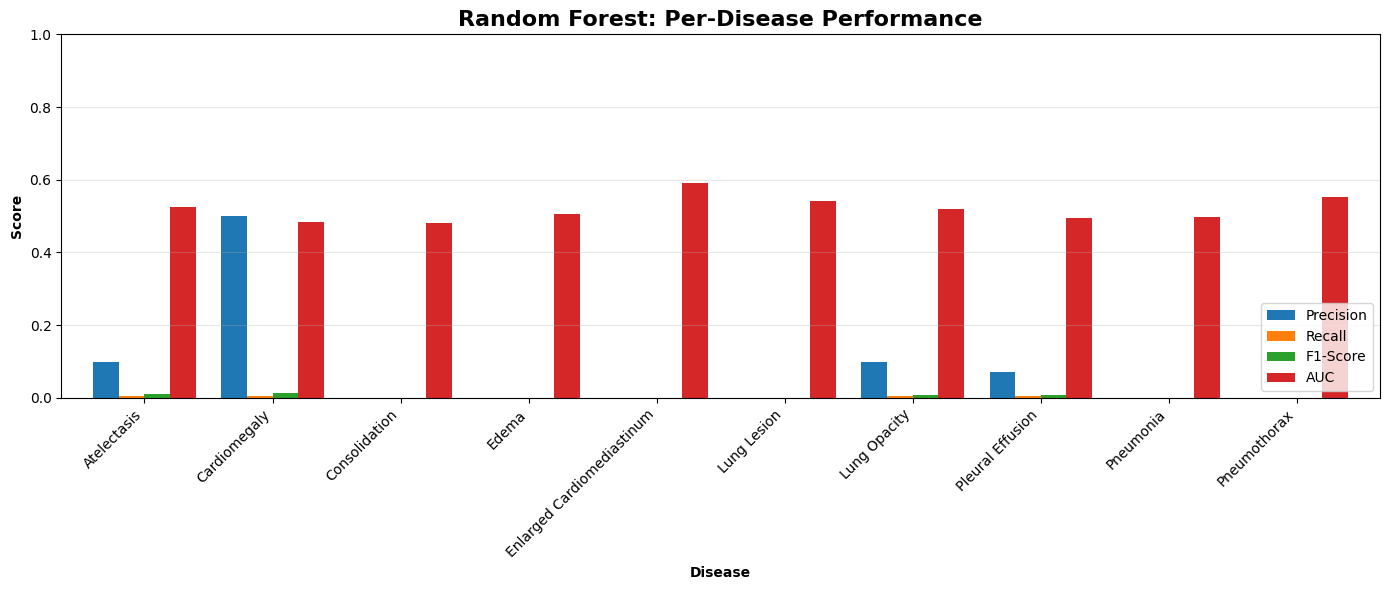

In [27]:
# Per-disease performance comparison (using best model - Random Forest)
fig, ax = plt.subplots(figsize=(14, 6))

rf_results.set_index('Disease')[['Precision', 'Recall', 'F1-Score', 'AUC']].plot(
    kind='bar', ax=ax, width=0.8
)

ax.set_title('Random Forest: Per-Disease Performance', fontweight='bold', fontsize=16)
ax.set_xlabel('Disease', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_xticklabels(rf_results['Disease'], rotation=45, ha='right')
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.show()

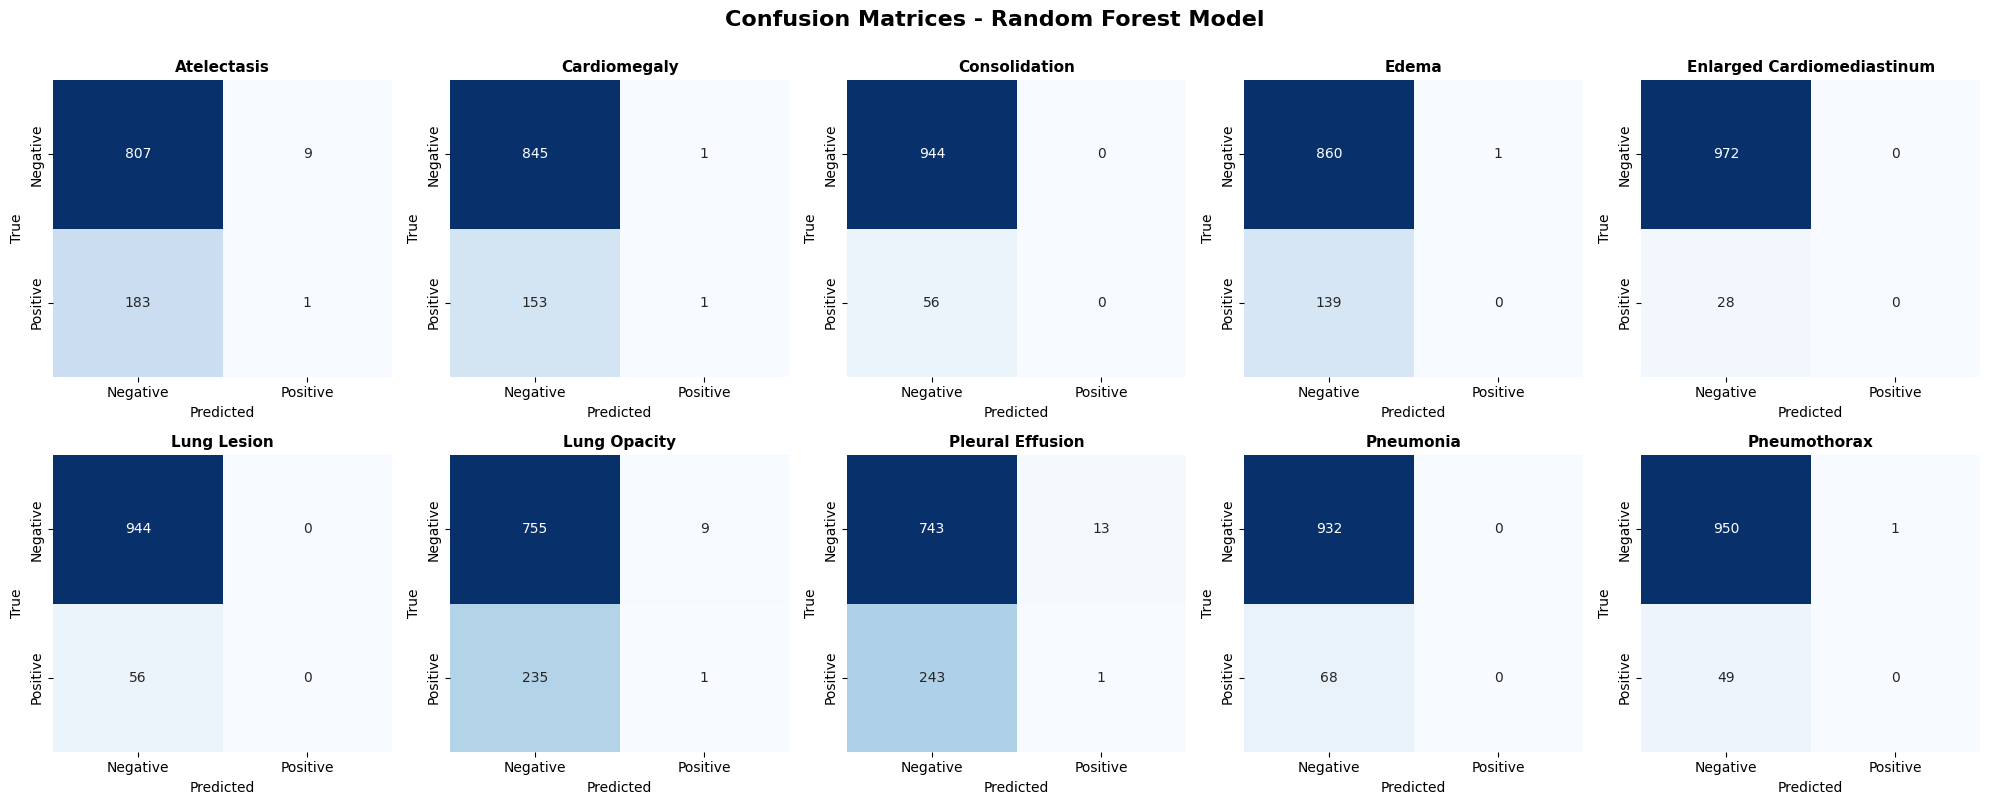

In [28]:
# Confusion matrices for each disease (Random Forest)
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, disease in enumerate(DISEASE_COLUMNS):
    cm = confusion_matrix(y_test[:, i], rf_pred[:, i])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'],
                cbar=False)
    axes[i].set_title(disease, fontweight='bold', fontsize=11)
    axes[i].set_ylabel('True')
    axes[i].set_xlabel('Predicted')

plt.suptitle('Confusion Matrices - Random Forest Model', fontweight='bold', fontsize=16, y=1.00)
plt.tight_layout()
plt.show()

Sample images from dataset:



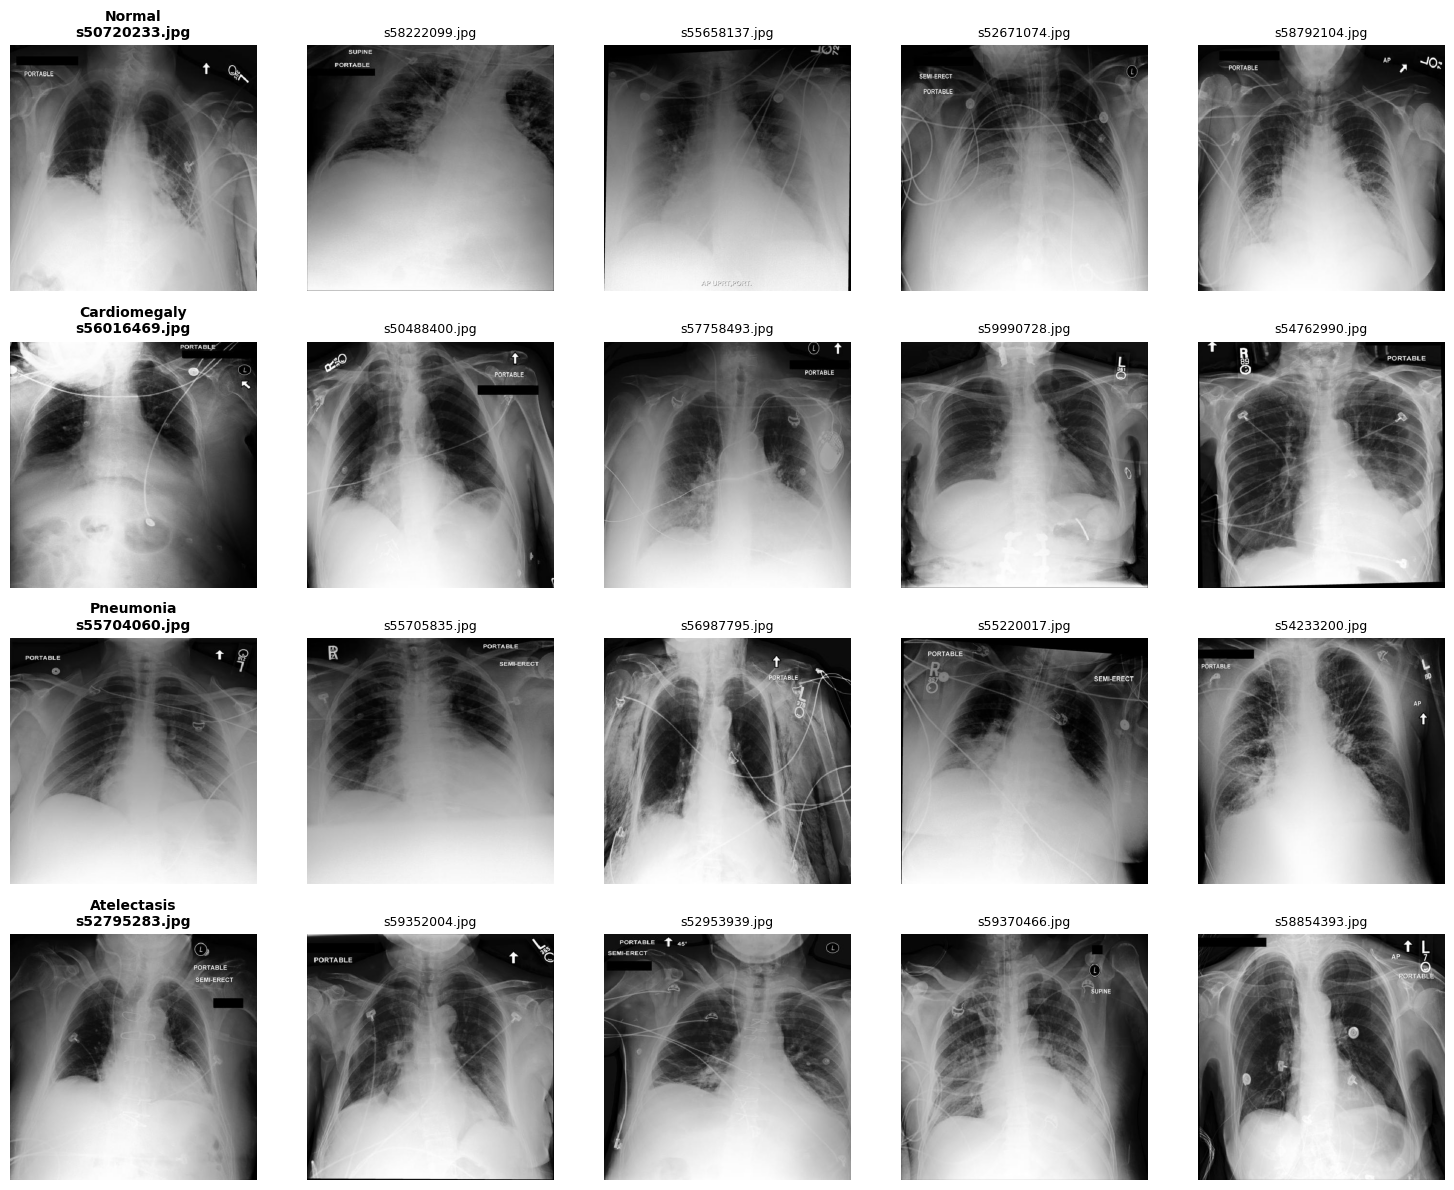

In [29]:
# Display sample images from each category
def show_sample_images(df, diseases, n_samples=3):
    """
    Display sample images for each disease
    """
    fig, axes = plt.subplots(len(diseases), n_samples, figsize=(15, len(diseases) * 3))

    for i, disease in enumerate(diseases):
        # Get samples for this disease
        disease_samples = df[df[disease] == 1].sample(min(n_samples, sum(df[disease] == 1)))

        for j, (idx, row) in enumerate(disease_samples.iterrows()):
            if len(diseases) == 1:
                ax = axes[j]
            else:
                ax = axes[i, j]

            try:
                img = Image.open(row['image_path'])
                ax.imshow(img, cmap='gray')
                ax.axis('off')

                if j == 0:
                    ax.set_title(f"{disease}\n{row['filename']}",
                               fontweight='bold', fontsize=10)
                else:
                    ax.set_title(row['filename'], fontsize=9)
            except Exception as e:
                ax.text(0.5, 0.5, 'Image not found',
                       ha='center', va='center')
                ax.axis('off')

    plt.tight_layout()
    plt.show()

# Show samples for key diseases
sample_diseases = ['Normal', 'Cardiomegaly', 'Pneumonia', 'Atelectasis']
print("Sample images from dataset:\n")
show_sample_images(df, sample_diseases, n_samples=5)

In [30]:
print('='*70)
print('SAVING MODELS')
print('='*70 + '\n')

SAVE_DIR = '/content/saved_models'
os.makedirs(SAVE_DIR, exist_ok=True)

joblib.dump(rf_model, f'{SAVE_DIR}/random_forest_model.pkl')
joblib.dump(lr_model, f'{SAVE_DIR}/logistic_regression_model.pkl')
joblib.dump(gb_model, f'{SAVE_DIR}/gradient_boosting_model.pkl')
joblib.dump(scaler, f'{SAVE_DIR}/feature_scaler.pkl')
if USE_PCA:
    joblib.dump(pca, f'{SAVE_DIR}/pca_transformer.pkl')

print('✅ Models saved locally')

# Copy to Drive
!cp -r {SAVE_DIR}/* /content/drive/MyDrive/
print('✅ Copied to Google Drive!')

for file in os.listdir(SAVE_DIR):
    size = os.path.getsize(f'{SAVE_DIR}/{file}') / (1024*1024)
    print(f'   {file:40s} {size:>8.2f} MB')

SAVING MODELS

✅ Models saved locally
✅ Copied to Google Drive!
   feature_scaler.pkl                           0.02 MB
   logistic_regression_model.pkl                0.01 MB
   pca_transformer.pkl                          0.81 MB
   gradient_boosting_model.pkl                  3.10 MB
   random_forest_model.pkl                      5.33 MB


In [31]:
def predict_from_image(image_path, model='rf', threshold=0.5, verbose=True):
    """Predict diseases from X-ray image"""

    models = {'rf': ('Random Forest', rf_model), 'lr': ('Logistic Regression', lr_model), 'gb': ('Gradient Boosting', gb_model)}
    if model not in models:
        return {'error': f"Invalid model '{model}'"}

    model_name, selected_model = models[model]

    if verbose:
        print(f'\n🔍 Using {model_name}')
        print(f'📁 Image: {image_path}\n')

    features_list = extract_features_batch([image_path], IMG_SIZE)
    if not features_list or features_list[0] is None:
        return {'error': 'Could not extract features from image.'}

    X = features_list[0].reshape(1, -1)
    X_scaled = scaler.transform(X)
    X_final = pca.transform(X_scaled) if USE_PCA and pca else X_scaled

    predictions = selected_model.predict(X_final)
    probabilities = selected_model.predict_proba(X_final)
    proba_positive = np.array([prob[0, 1] for prob in probabilities]).T

    results = {
        'model_name': model_name,
        'predictions': {},
        'probabilities': {},
        'detected_diseases': [],
        'threshold': threshold
    }

    for i, disease in enumerate(DISEASE_COLUMNS):
        prob = float(proba_positive[i])
        results['predictions'][disease] = 'Positive' if prob >= threshold else 'Negative'
        results['probabilities'][disease] = prob

        if prob >= threshold:
            conf = 'High' if prob >= 0.8 else 'Medium' if prob >= 0.6 else 'Low'
            results['detected_diseases'].append({'disease': disease, 'probability': prob, 'confidence': conf})

    results['detected_diseases'].sort(key=lambda x: x['probability'], reverse=True)

    if verbose:
        print('='*70)
        if results['detected_diseases']:
            print(f"⚠️  DETECTED {len(results['detected_diseases'])} CONDITION(S):\n")
            for item in results['detected_diseases']:
                emoji = "🔴" if item['probability'] >= 0.8 else "🟠" if item['probability'] >= 0.6 else "🟡"
                print(f"  {emoji} {item['disease']:30s} {item['probability']:>6.1%}  [{item['confidence']}]")
        else:
            print('✅ NO CONDITIONS DETECTED')
        print('='*70 + '\n')

    return results

print('✅ Prediction function ready!')

✅ Prediction function ready!


In [32]:
def visualize_prediction(image_path, model='rf', threshold=0.5):
    """Visualize prediction with image and bar chart"""

    results = predict_from_image(image_path, model, threshold, verbose=False)
    if 'error' in results:
        print(f'❌ Error: {results["error"]}')
        return

    img = cv2.imread(image_path, 0)
    fig = plt.figure(figsize=(18, 7))
    gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5], wspace=0.3)

    # Image
    ax1 = fig.add_subplot(gs[0])
    ax1.imshow(img, cmap='gray')
    ax1.set_title('Chest X-Ray', fontsize=16, fontweight='bold', pad=20)
    ax1.axis('off')

    # Predictions
    ax2 = fig.add_subplot(gs[1])
    detected = len(results['detected_diseases'])
    title = f"🔍 {results['model_name'].upper()}\n" + (f"⚠️  {detected} Detected" if detected > 0 else "✅ None Detected")
    ax2.text(0.5, 1.08, title, ha='center', va='top', transform=ax2.transAxes, fontsize=13, fontweight='bold', color='darkred' if detected else 'darkgreen')

    probabilities = [results['probabilities'][d] for d in DISEASE_COLUMNS]
    colors = ['#d32f2f' if p >= 0.8 else '#ff6f00' if p >= threshold else '#fbc02d' if p >= 0.3 else '#388e3c' for p in probabilities]

    y_pos = np.arange(len(DISEASE_COLUMNS))
    bars = ax2.barh(y_pos, probabilities, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(DISEASE_COLUMNS, fontsize=11, fontweight='bold')
    ax2.set_xlabel('Probability', fontsize=12, fontweight='bold')
    ax2.set_xlim([0, 1.0])
    ax2.axvline(x=threshold, color='black', linestyle='--', linewidth=2.5, label=f'Threshold ({threshold*100:.0f}%)')
    ax2.grid(axis='x', alpha=0.3, linestyle=':')
    ax2.legend(loc='lower right')

    for i, (bar, prob) in enumerate(zip(bars, probabilities)):
        x = prob + 0.02 if prob < 0.85 else prob - 0.02
        ha = 'left' if prob < 0.85 else 'right'
        color = 'black' if prob < 0.85 else 'white'
        ax2.text(x, i, f'{prob:.1%}', va='center', ha=ha, fontsize=10, fontweight='bold', color=color)

    plt.tight_layout()
    plt.show()

    if detected:
        print(f'\n⚠️  DETECTED CONDITIONS:')
        for item in results['detected_diseases']:
            print(f"  • {item['disease']:30s} {item['probability']:>6.1%}  [{item['confidence']}]")

print('✅ Visualization function ready!')

✅ Visualization function ready!


Testing: /content/mimic_cxr_data/test/s52804047.jpg



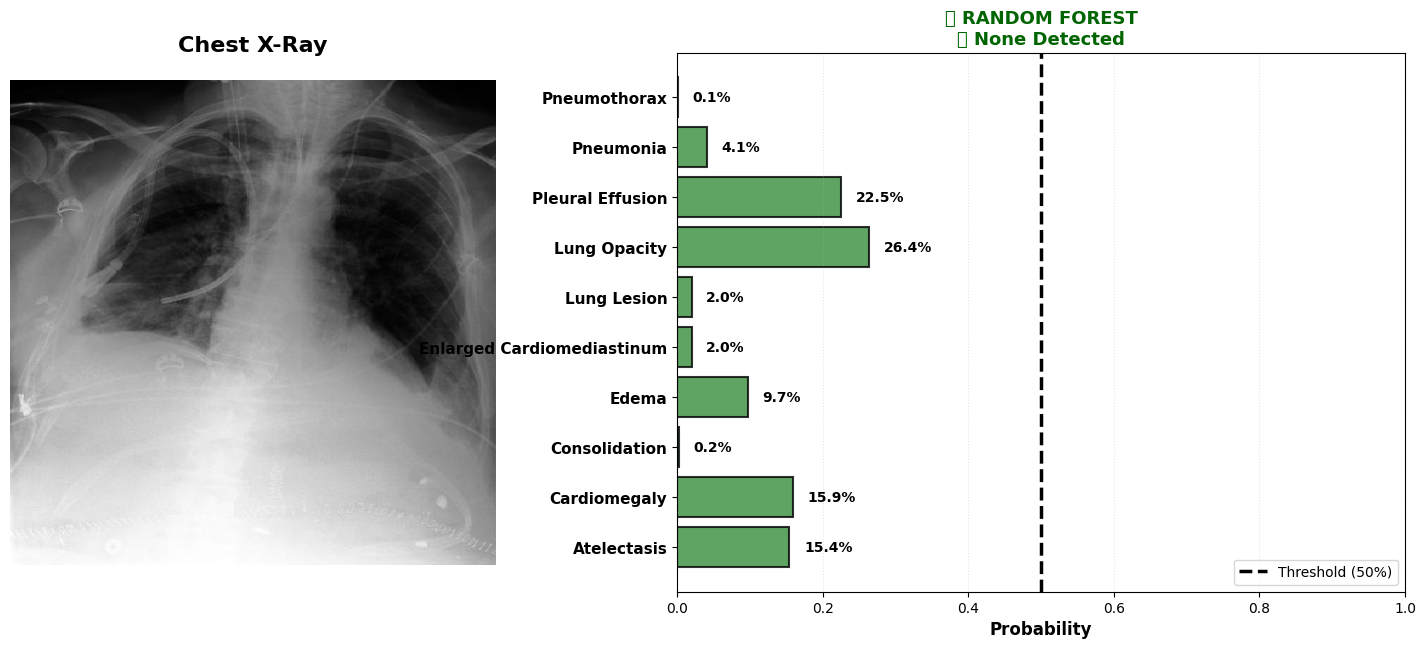

In [42]:
# Test on sample image
test_image = test_df.iloc[100]['image_path']
print(f'Testing: {test_image}\n')

visualize_prediction(test_image, model='rf', threshold=0.5)

In [43]:
print('='*70)
print('COMPARING ALL MODELS')
print('='*70 + '\n')

for m in ['rf', 'lr', 'gb']:
    results = predict_from_image(test_image, model=m, threshold=0.5, verbose=False)
    print(f"\n{results['model_name']}:")
    if results['detected_diseases']:
        for d in results['detected_diseases']:
            print(f"  • {d['disease']}: {d['probability']:.1%}")
    else:
        print('  ✓ None detected')

COMPARING ALL MODELS


Random Forest:
  ✓ None detected

Logistic Regression:
  ✓ None detected

Gradient Boosting:
  ✓ None detected


Upload your X-ray image:


Saving s50016102.jpg to s50016102.jpg

✅ Uploaded: s50016102.jpg



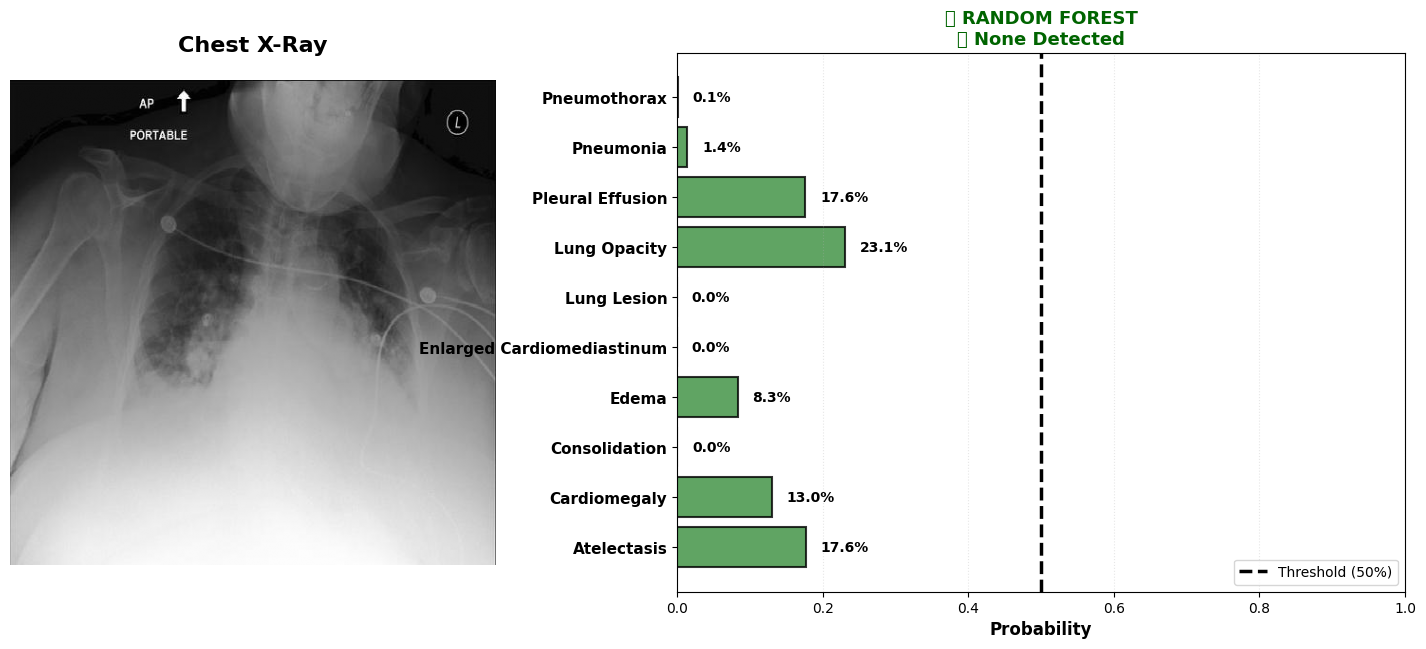

In [45]:
from google.colab import files

print('Upload your X-ray image:')
uploaded = files.upload()

if uploaded:
    filename = list(uploaded.keys())[0]
    filepath = f'/content/{filename}'
    print(f'\n✅ Uploaded: {filename}\n')
    visualize_prediction(filepath, model='rf', threshold=0.5)

In [46]:
# Save results to CSV and JSON
import json

# Save per-disease results
rf_results.to_csv('random_forest_results.csv', index=False)
lr_results.to_csv('logistic_regression_results.csv', index=False)
gb_results.to_csv('gradient_boosting_results.csv', index=False)

print("✅ Results saved to CSV files")

# Save summary results
summary = {
    'random_forest': {
        'avg_accuracy': float(rf_results['Accuracy'].mean()),
        'avg_precision': float(rf_results['Precision'].mean()),
        'avg_recall': float(rf_results['Recall'].mean()),
        'avg_f1': float(rf_results['F1-Score'].mean()),
        'avg_auc': float(rf_results['AUC'].mean())
    },
    'logistic_regression': {
        'avg_accuracy': float(lr_results['Accuracy'].mean()),
        'avg_precision': float(lr_results['Precision'].mean()),
        'avg_recall': float(lr_results['Recall'].mean()),
        'avg_f1': float(lr_results['F1-Score'].mean()),
        'avg_auc': float(lr_results['AUC'].mean())
    },
    'gradient_boosting': {
        'avg_accuracy': float(gb_results['Accuracy'].mean()),
        'avg_precision': float(gb_results['Precision'].mean()),
        'avg_recall': float(gb_results['Recall'].mean()),
        'avg_f1': float(gb_results['F1-Score'].mean()),
        'avg_auc': float(gb_results['AUC'].mean())
    }
}

with open('model_summary.json', 'w') as f:
    json.dump(summary, f, indent=4)

print("✅ Summary saved to JSON")
print("\nSummary:")
print(json.dumps(summary, indent=2))

✅ Results saved to CSV files
✅ Summary saved to JSON

Summary:
{
  "random_forest": {
    "avg_accuracy": 0.8756,
    "avg_precision": 0.07714285714285714,
    "avg_recall": 0.002026393789353307,
    "avg_f1": 0.003901181045633742,
    "avg_auc": 0.5197795349264125
  },
  "logistic_regression": {
    "avg_accuracy": 0.8651,
    "avg_precision": 0.13535259717922257,
    "avg_recall": 0.022812383250255655,
    "avg_f1": 0.03799091937657091,
    "avg_auc": 0.5072093708148401
  },
  "gradient_boosting": {
    "avg_accuracy": 0.8702,
    "avg_precision": 0.12042128603104212,
    "avg_recall": 0.011375085680712275,
    "avg_f1": 0.020589861716737747,
    "avg_auc": 0.5094307456960918
  }
}


In [48]:
# Copy all saved files to Google Drive
print("Copying files to Google Drive...\n")

!cp random_forest_model.pkl /content/drive/MyDrive/
!cp logistic_regression_model.pkl /content/drive/MyDrive/
!cp gradient_boosting_model.pkl /content/drive/MyDrive/
!cp feature_scaler.pkl /content/drive/MyDrive/

if USE_PCA:
    !cp pca_transformer.pkl /content/drive/MyDrive/

!cp random_forest_results.csv /content/drive/MyDrive/
!cp logistic_regression_results.csv /content/drive/MyDrive/
!cp gradient_boosting_results.csv /content/drive/MyDrive/
!cp model_summary.json /content/drive/MyDrive/

print("\n✅ All files copied to Google Drive!")
print("\nFiles saved in Google Drive:")
print("  - random_forest_model.pkl")
print("  - logistic_regression_model.pkl")
print("  - gradient_boosting_model.pkl")
print("  - feature_scaler.pkl")
if USE_PCA:
    print("  - pca_transformer.pkl")
print("  - random_forest_results.csv")
print("  - logistic_regression_results.csv")
print("  - gradient_boosting_results.csv")
print("  - model_summary.json")

Copying files to Google Drive...

cp: cannot stat 'random_forest_model.pkl': No such file or directory
cp: cannot stat 'logistic_regression_model.pkl': No such file or directory
cp: cannot stat 'gradient_boosting_model.pkl': No such file or directory
cp: cannot stat 'feature_scaler.pkl': No such file or directory
cp: cannot stat 'pca_transformer.pkl': No such file or directory

✅ All files copied to Google Drive!

Files saved in Google Drive:
  - random_forest_model.pkl
  - logistic_regression_model.pkl
  - gradient_boosting_model.pkl
  - feature_scaler.pkl
  - pca_transformer.pkl
  - random_forest_results.csv
  - logistic_regression_results.csv
  - gradient_boosting_results.csv
  - model_summary.json
